In [1]:
pip install scikit-learn numpy pandas tensorflow

Mount Google Drive and Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/MyDrive/Student dataset/sample_dataset.csv'

try:
  data = pd.read_csv(file_path)
  print("Dataset loaded successfully!")
except FileNotFoundError:
  print(f"File not found at: {file_path}")
  print("Please make sure the file exists and the path is correct.")
except Exception as e:
  print(f"An error occurred while loading the dataset: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully!


In [5]:
data.head()

,Student_ID,Pre_Assessment_Score,Learning_Style,Time_Spent_Learning,Quiz_Score,Content_Engagement
0,1,73,Visual,32 mins,100,High
1,2,49,Kinesthetic,51 mins,79,High
2,3,99,Auditory,24 mins,88,High
3,4,92,Visual,58 mins,85,High
4,5,70,Visual,27 mins,87,High


Train a Decision Tree Model

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Encode categorical features using get_dummies
data_encoded = pd.get_dummies(data, columns=['Learning_Style', 'Content_Engagement'])

# Prepare features and labels
X = data_encoded[['Pre_Assessment_Score', 'Time_Spent_Learning', 'Learning_Style_Auditory',
                  'Learning_Style_Visual', 'Learning_Style_Kinesthetic',
                  'Content_Engagement_High', 'Content_Engagement_Medium', 'Content_Engagement_Low']]

# Ensure 'Time_Spent_Learning' is converted correctly
X['Time_Spent_Learning'] = (
    X['Time_Spent_Learning']
    .astype(str)
    .str.replace(' mins', '')  # Remove the ' mins' text
    .astype(float)              # Convert to float
    .astype(int)                # Convert to integer
)


# Ensure 'Time_Spent_Learning' is treated as a string
X['Time_Spent_Learning'] = X['Time_Spent_Learning'].astype(str).str.replace(' mins', '').astype(int)


y = data['Quiz_Score'] > 70  # True if the student scored above 70, otherwise False

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Test the model
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Show accuracy as percentage
accuracy_percentage = accuracy * 100
print(f"Model Accuracy: {accuracy_percentage:.2f}%")


Model Accuracy: 30.00%


<ipython-input-13-e7294bacddae>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Time_Spent_Learning'] = (
<ipython-input-13-e7294bacddae>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Time_Spent_Learning'] = X['Time_Spent_Learning'].astype(str).str.replace(' mins', '').astype(int)


Visualize the decision tree

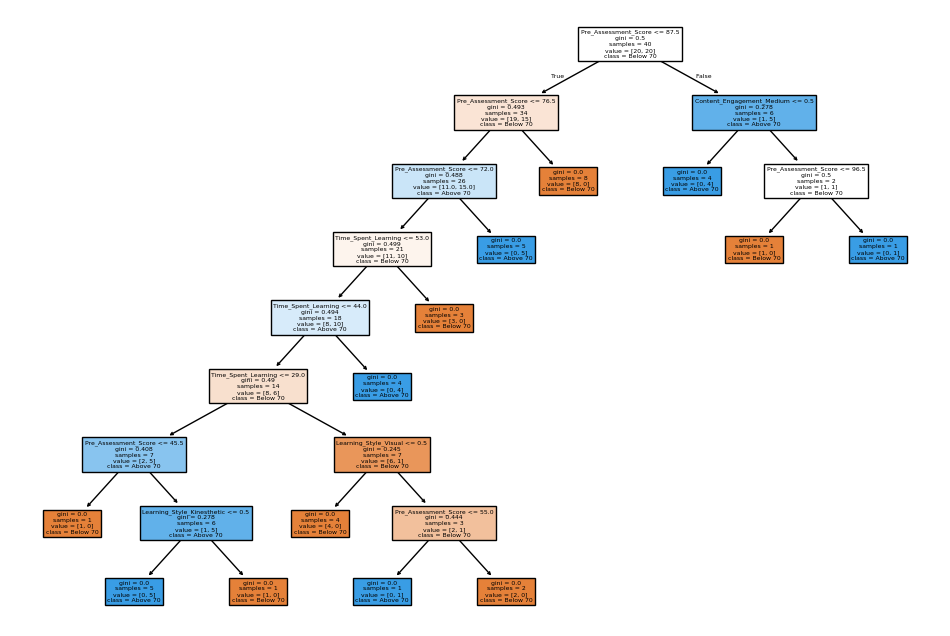

In [11]:
# prompt: Visualize the decision tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Below 70', 'Above 70'], filled=True)
plt.show()

 Implement Using TensorFlow or PyTorch
 Q-learning in TensorFlow:

In [12]:
import numpy as np
import tensorflow as tf

# Define constants
num_actions = 3  # e.g., 0: New Topic, 1: Review Content, 2: Change Format
num_states = 5  # Simplified representation of student states

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.9
exploration_rate = 1.0
exploration_decay = 0.99

# Initialize Q-table
Q_table = np.zeros((num_states, num_actions))

# Sample training loop
for episode in range(1000):
    state = np.random.randint(0, num_states)  # Random initial state
    done = False

    while not done:
        # Choose an action (exploration vs. exploitation)
        if np.random.rand() < exploration_rate:
            action = np.random.randint(0, num_actions)  # Explore
        else:
            action = np.argmax(Q_table[state])  # Exploit

        # Simulate the result of the action (this part needs to be based on your real data)
        next_state = np.random.randint(0, num_states)
        reward = np.random.randn()  # Simplified reward signal

        # Update Q-value
        Q_table[state, action] = Q_table[state, action] + learning_rate * (
            reward + discount_factor * np.max(Q_table[next_state]) - Q_table[state, action]
        )

        state = next_state
        if np.random.rand() < 0.1:  # End condition for simulation
            done = True

    # Decay exploration rate
    exploration_rate *= exploration_decay

print("Trained Q-Table:", Q_table)


Trained Q-Table: [[-7.23866746e-01  7.72400492e-02 -6.26414414e-01]
 [-7.03929603e-01 -5.79295483e-01 -3.00541818e-04]
 [-4.68736966e-01 -5.11473815e-01  4.86895495e-01]
 [-7.39382707e-01 -7.69493622e-01  2.85334468e-01]
 [ 2.47379094e-01 -5.33263242e-01 -5.26629201e-01]]
